#<b>Проект: Исследование популярности фильмов и шоу Netflix.</b>

##<b>Описание проекта:</b>
 Netflix - одна из самых популярных платформ для потоковой передачи мультимедиа и видео.<br>

 На их платформе доступно более 8000 фильмов или телешоу, по состоянию на середину 2021 года у них более 200 миллионов подписчиков по всему миру.<br>

 Этот табличный набор данных состоит из списков всех фильмов и телешоу, доступных на Netflix, наряду с такими подробностями, как актерский состав, режиссеры, рейтинги, год выпуска, продолжительность и т.д.

##<b>Описание данных:</b>

- <b>show_id</b> - уникальный идентификатор для каждого фильма / телешоу;
- <b>type</b> - тип (фильм/шоу);
- <b>title</b> - название фильма/телешоу;
- <b>director</b> - режиссер фильма;
- <b>cast</b> - актеры, задействованные в фильме/шоу;
- <b>country</b> - страна, в которой был снят фильм/шоу;
- <b>date_added</b> - дата его добавления на Netflix;
- <b>release_year</b> - год выхода фильма/шоу;
- <b>rating</b> - рейтинга фильма/шоу;
- <b>duration</b> - общая продолжительность;
- <b>listed_in</b> - категория, жанр;
- <b>description</b> - описание содержания.


##<b>Задачи исследования:</b>

<b>Предобработка данных</b>

- Проверим пропуски и типы данных. Откорректируем, если это потребуется.
- Проверим данные на дубликаты.

<b>Исследовательский анализ данных</b>

- Доля кинематографа по типу.
- Топ 10 режиссеров по количеству отснятых картин.
- Топ 10 стран по количеству отснятых картин.
- Популярность шоу по рейтингу.
- Количество релизов по годам.
- Количество сезонов в сериалах.
- Продолжительность фильмов.
- Разбивка по тв-шоу и фильмов по жанрам.

<b>Общий вывод</b>

In [1]:
!gdown --id 1z8r-2iLKBSJlSPPHDqOiu4hti1haa5jm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z8r-2iLKBSJlSPPHDqOiu4hti1haa5jm
To: /content/netflix_titles.csv
100% 3.40M/3.40M [00:00<00:00, 20.4MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# <b>Предобработка данных.</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['director'] = df['director'].fillna('No Data')
df['cast'] = df['cast'].fillna('No Data')
df['country'] = df['country'].fillna('No Data')
df['date_added'] = df['date_added'].fillna('No Data')
df['rating'] = df['rating'].fillna('Unrated')
df['duration'] = df['duration'].fillna('No Data')

In [8]:
df.duplicated().sum()

0

In [9]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [11]:
df.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1768
release_year      74
rating            18
duration         221
listed_in        514
description     8775
dtype: int64

# <b> Исследовательский анализ данных.</b>

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##<b>Доля кинематографа по типу.</b>

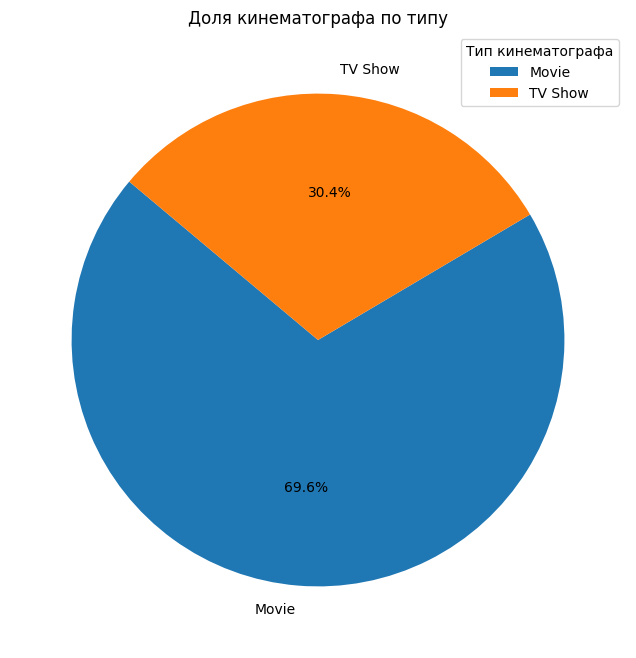

In [28]:
type_counts = df['type'].value_counts()
plt.figure(figsize = (10, 8))
plt.pie(type_counts, labels = type_counts.index, autopct = '%1.1f%%', startangle=140)
plt.legend(type_counts.index, title = 'Тип кинематографа')
plt.title('Доля кинематографа по типу')
plt.show()

##<b>Топ 10 режиссеров по количеству отснятых картин.</b>

In [39]:
top_10_directors = df[df['director'] != 'No Data']['director'].value_counts().head(10)

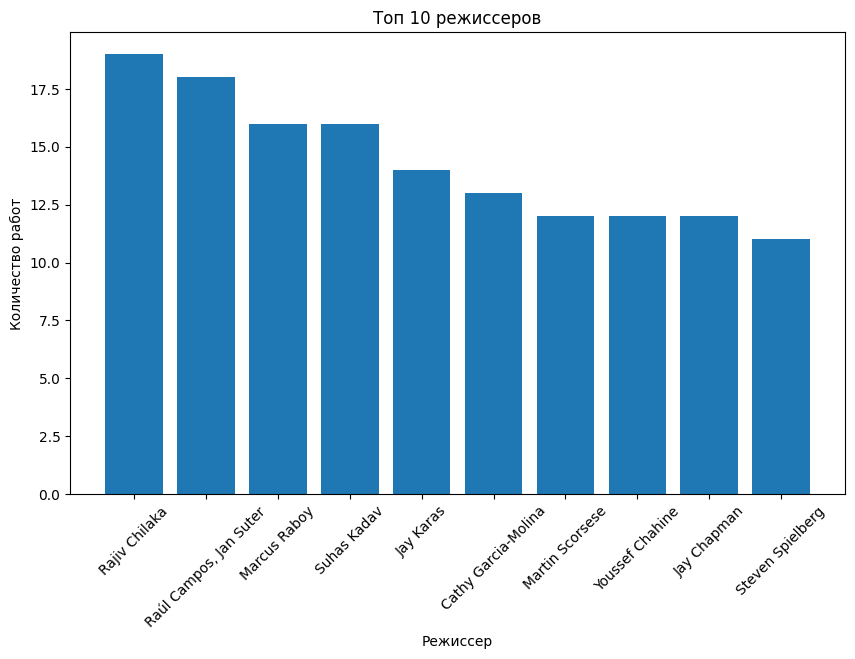

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.xticks(rotation=45)
plt.title('Топ 10 режиссеров')
plt.xlabel('Режиссер')
plt.ylabel('Количество работ')
plt.show()

In [48]:
top_10_directors

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

##<b>Топ 10 стран по количеству отснятых картин.</b>

In [56]:
top_10_countries = df[df['country'] != 'No Data']['country'].value_counts().head(10)

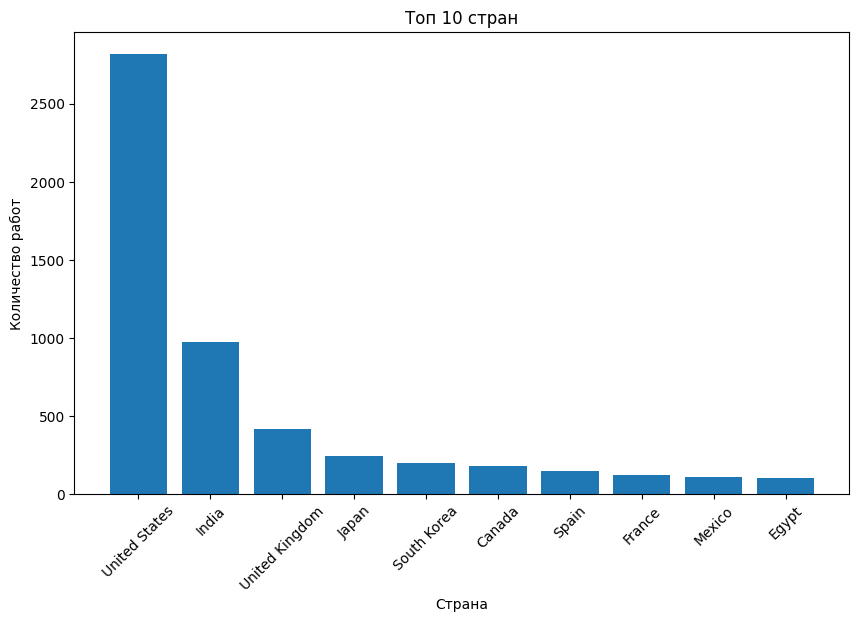

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xticks(rotation=45)
plt.title('Топ 10 стран')
plt.xlabel('Страна')
plt.ylabel('Количество работ')
plt.show()

In [58]:
top_10_countries

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

##<b>Популярность шоу по рейтингу.</b>

In [62]:
top_10_raiting = df['rating'].value_counts().head(10)

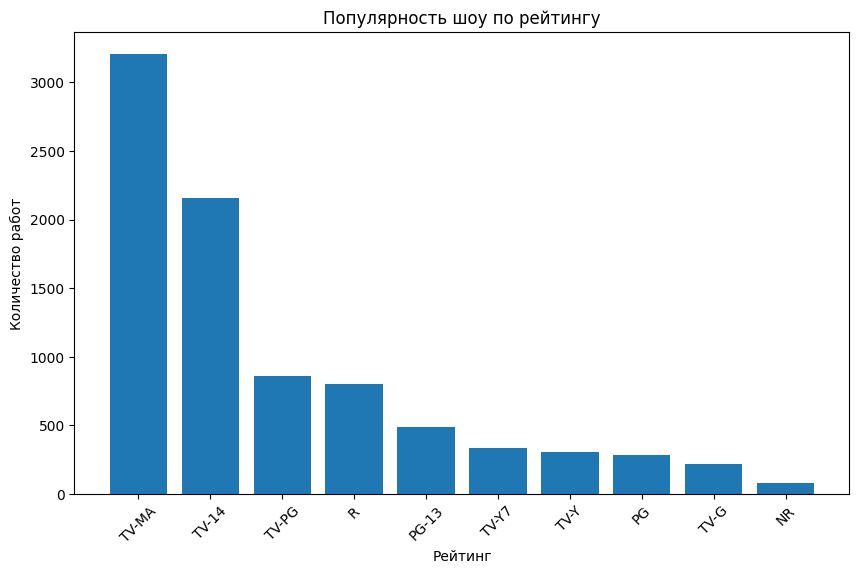

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_raiting.index, top_10_raiting.values)
plt.xticks(rotation=45)
plt.title('Популярность шоу по рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество работ')
plt.show()

In [64]:
top_10_raiting

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

##<b>Количество релизов по годам.</b>

In [74]:
top_25_release_year = df['release_year'].value_counts().head(25)

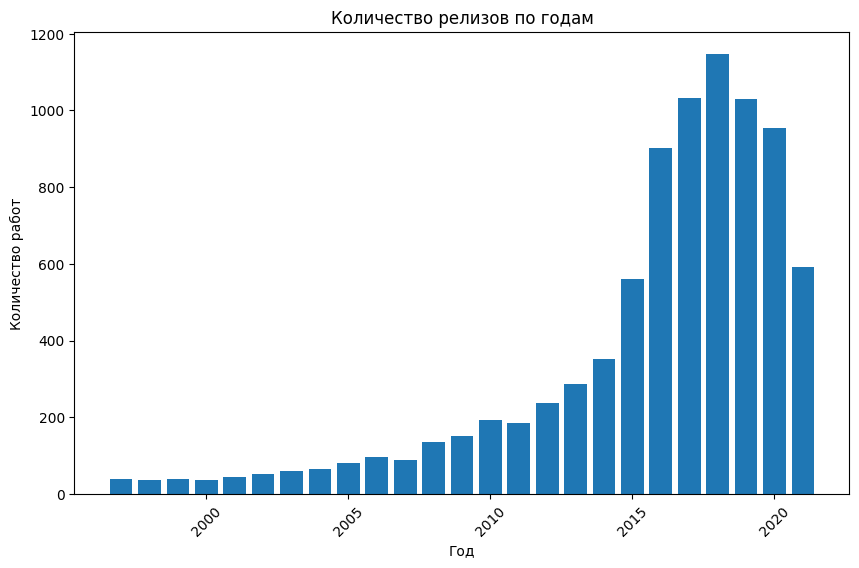

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(top_25_release_year.index, top_25_release_year.values)
plt.xticks(rotation=45)
plt.title('Количество релизов по годам')
plt.xlabel('Год')
plt.ylabel('Количество работ')
plt.show()

In [76]:
top_25_release_year

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
2001      45
1999      39
1997      38
2000      37
1998      36
Name: release_year, dtype: int64

##<b>Количество сезонов в сериалах.</b>

In [83]:
count_seasons_tv_show = df[df['type'] == 'TV Show']['duration'].value_counts()

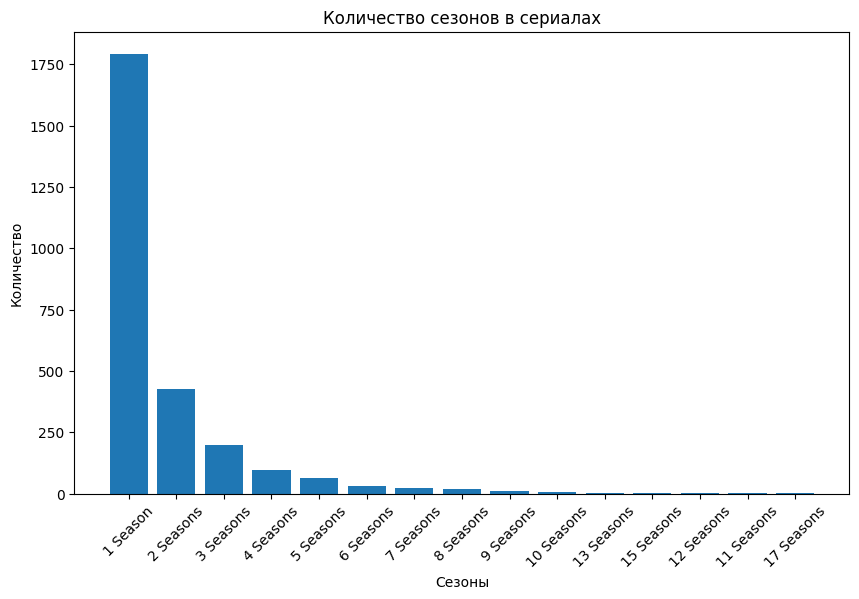

In [85]:
plt.figure(figsize=(10, 6))
plt.bar(count_seasons_tv_show.index, count_seasons_tv_show.values)
plt.xticks(rotation=45)
plt.title('Количество сезонов в сериалах')
plt.xlabel('Сезоны')
plt.ylabel('Количество')
plt.show()

In [86]:
count_seasons_tv_show

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

##<b>Продолжительность фильмов.</b>

In [90]:
count_duration_movie = df[df['type'] == 'Movie']['duration'].value_counts()

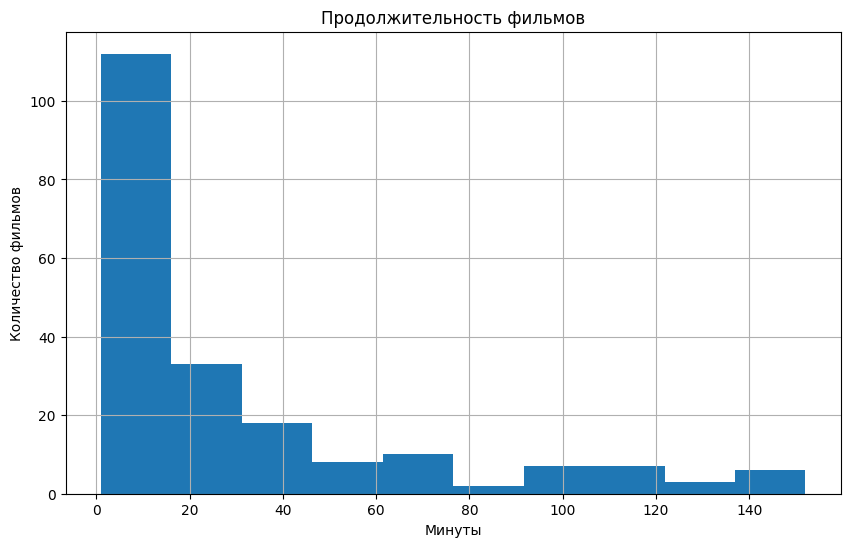

In [97]:
plt.figure(figsize=(10, 6))
plt.hist(count_duration_movie)
plt.title('Продолжительность фильмов')
plt.xlabel('Минуты')
plt.ylabel('Количество фильмов')
plt.grid()
plt.show()

##<b>Разбивка по тв-шоу и фильмов по жанрам.</b>

In [101]:
df['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [105]:
listed_types = set()
for row, items in df.iterrows():
    for item in items['listed_in'].split(","):
        listed_types.add(item.strip())

In [112]:
listed_counts = {}
for row, items in df.iterrows():
    for item in items['listed_in'].split(","):
        stripped_item = item.strip()
        if stripped_item in listed_counts:
            listed_counts[stripped_item] += 1
        else:
            listed_counts[stripped_item] = 1

In [113]:
listed_counts

{'Documentaries': 869,
 'International TV Shows': 1351,
 'TV Dramas': 763,
 'TV Mysteries': 98,
 'Crime TV Shows': 470,
 'TV Action & Adventure': 168,
 'Docuseries': 395,
 'Reality TV': 255,
 'Romantic TV Shows': 370,
 'TV Comedies': 581,
 'TV Horror': 75,
 'Children & Family Movies': 641,
 'Dramas': 2427,
 'Independent Movies': 756,
 'International Movies': 2752,
 'British TV Shows': 253,
 'Comedies': 1674,
 'Spanish-Language TV Shows': 174,
 'Thrillers': 577,
 'Romantic Movies': 616,
 'Music & Musicals': 375,
 'Horror Movies': 357,
 'Sci-Fi & Fantasy': 243,
 'TV Thrillers': 57,
 "Kids' TV": 451,
 'Action & Adventure': 859,
 'TV Sci-Fi & Fantasy': 84,
 'Classic Movies': 116,
 'Anime Features': 71,
 'Sports Movies': 219,
 'Anime Series': 176,
 'Korean TV Shows': 151,
 'Science & Nature TV': 92,
 'Teen TV Shows': 69,
 'Cult Movies': 71,
 'TV Shows': 16,
 'Faith & Spirituality': 65,
 'LGBTQ Movies': 102,
 'Stand-Up Comedy': 343,
 'Movies': 57,
 'Stand-Up Comedy & Talk Shows': 56,
 'Class

In [116]:
counts_df = pd.DataFrame(listed_counts.items(), columns=['genre', 'count'])

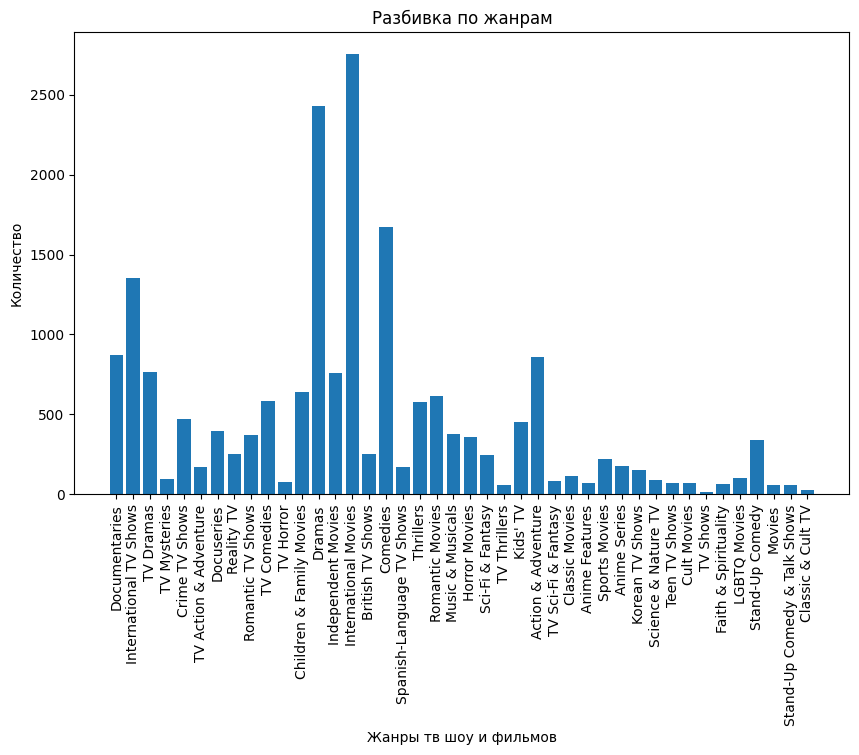

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(counts_df['genre'], counts_df['count'])
plt.xticks(rotation=90)
plt.title('Разбивка по жанрам')
plt.xlabel('Жанры тв шоу и фильмов')
plt.ylabel('Количество')
plt.show()

#<b>Общий вывод:</b>

- Эфир наполняют телевизионные шоу (<b>30.4%</b>) и кино (<b>69.6%</b>).
- Режиссер по имени <b>Rajiv Chilaka</b> снял больше всего фильмов, а именно <b>19</b>.
- Большинство телешоу и фильмов снимаются в <b>Соединенных Штатах</b>.
- Самые популярные рейтинги для телешоу - <b>TV-MA</b> и <b>TV-14</b>.
- С 2015 по 2020 год произошел большой рост выпуска телешоу и фильмов, а пик активности был в <b>2018</b> году.
- Большинство сериалов заканчиваются после <b>первого сезона</b>.
- В списке фильмов есть много <b>короткометражных</b> фильмов, длительность которых не более <b>18</b> минут.
- Самые популярные жанры включают <b>независимое кино</b> и <b>фильмы для детей и семейного</b> просмотра.